<a href="https://colab.research.google.com/github/gsindhu455/PythonProgramming/blob/master/PA_week_3_and_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/s/kr6f2lednm1pvc4/heart_failure_clinical_records_dataset%20%281%29.csv

--2021-04-12 17:58:08--  https://www.dropbox.com/s/kr6f2lednm1pvc4/heart_failure_clinical_records_dataset%20%281%29.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/kr6f2lednm1pvc4/heart_failure_clinical_records_dataset%20%281%29.csv [following]
--2021-04-12 17:58:08--  https://www.dropbox.com/s/raw/kr6f2lednm1pvc4/heart_failure_clinical_records_dataset%20%281%29.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3cfa1c9b93843ffc8ee45a295d.dl.dropboxusercontent.com/cd/0/inline/BMcznZVqUPsiSad-Ew_byiROrm46yvPKP1FC5Nwh1CqkbGF_Zji89rfr4gRx9tpPToMe6gCZpC9KrxSRbHjylMsdP7ef92jveQjgGh5xEA2LKaNyW7GBmxwfo-vq9Fp9s6VKXbeDZqQasYwnuLSVKDHA/file# [following]
--2021-04-12 17:58:09--  https://uc3cfa1c9b93843ffc8ee45a295d.dl.dropb

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns


In [ ]:
data =pd.read_csv('/content/heart_failure_clinical_records_dataset (1).csv')
print(data.shape)
data.head()

(299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
#d={'yes':1,'no':0}
#df.var.map(d)
data[~data.applymap(np.isreal).all(1)]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


In [ ]:
data.isnull().any()
# every column's missing value is replaced with that column's median respectively
data=data.fillna(data.mean())
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


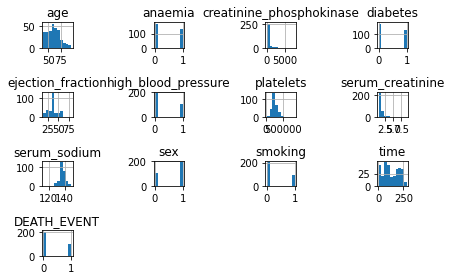

In [ ]:
data.hist()
plt.tight_layout()

In [ ]:
data.groupby(['DEATH_EVENT']).count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


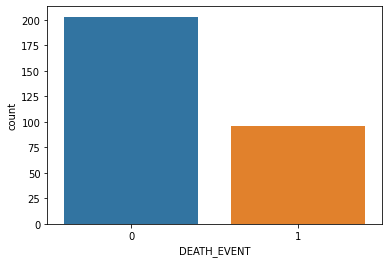

In [ ]:
sns.countplot(data.DEATH_EVENT,label='COUNT')

Confidence Interval¶
A confidence interval proposes a range of plausible values for an unknown parameter. This interval is associted with a confidence level that the parameter is located in the interval.

𝐶𝑜𝑛𝑓𝑖𝑑𝑒𝑛𝑐𝑒𝐼𝑛𝑡𝑒𝑟𝑣𝑎𝑙=[𝑃𝑜𝑖𝑛𝑡𝐸𝑠𝑡𝑖𝑚𝑎𝑡𝑒−𝑀𝑎𝑟𝑔𝑖𝑛𝑜𝑓𝐸𝑟𝑟𝑜𝑟,𝑃𝑜𝑖𝑛𝑡𝐸𝑠𝑡𝑖𝑚𝑎𝑡𝑒+𝑀𝑎𝑟𝑔𝑖𝑛𝑜𝑓𝐸𝑟𝑟𝑜𝑟]
1. Find the confidence interval of average of blood platelets in a human with 95% confidence level
Let us find the Point Estimate

In [ ]:
blood_platelets=data.platelets.sample(40,random_state=21)
blood_platelets

61     216000.00
297    140000.00
55     461000.00
243    220000.00
95     219000.00
130    249000.00
283    263358.03
154    235000.00
190    350000.00
237    173000.00
177    132000.00
180    303000.00
282    215000.00
223    130000.00
270    263358.03
196    263358.03
4      327000.00
143    229000.00
247    246000.00
211    147000.00
232    255000.00
292    382000.00
53     351000.00
256    294000.00
228    237000.00
134    231000.00
226    189000.00
16     262000.00
159    362000.00
52     263358.03
272    215000.00
168    270000.00
116    271000.00
176    105000.00
290    222000.00
199    263358.03
276    327000.00
197    259000.00
200     73000.00
257    253000.00
Name: platelets, dtype: float64

In [ ]:
point_estimate=blood_platelets.mean()
point_estimate

246669.75375

We have the point estimate of the population mean. Let us find out the Margin of Error in order to find the confidence interval.

If we know sample statistics then 𝑀𝑎𝑟𝑔𝑖𝑛𝑜𝑓𝐸𝑟𝑟𝑜𝑟=𝐶𝑟𝑖𝑡𝑖𝑐𝑎𝑙𝑉𝑎𝑙𝑢𝑒∗𝑆𝑡𝑎𝑛𝑑𝑎𝑟𝑑𝐸𝑟𝑟𝑜𝑟𝑜𝑓𝑆𝑎𝑚𝑝𝑙𝑒

As we do not know anything about population, we are going to calculate the Margin of Error using sample statistics

Let us find the critical value of the 95% confidence level and with 19 degrees of freedom

Critical Value
We calculate the critical value using Percent Point Function(PPF) which is an inverse of Cumulative Distributive Function(CDF)

Cumulative Distribution Function(CDF): The cumulative distribution function (cdf) is the probability that the variable takes a value less than or equal to x.

Percent Point Function(PPF): The percent point function (ppf) is the inverse of the cumulative distribution function. That is, for a distribution function we 

---

calculate the probability that the variable is less than or equal to x for a 

*   List item

> Indented block


*   List item

given x.

In [ ]:
from scipy.stats import t
p=0.95
df=39
critical_value=t.ppf(p,df)
print(critical_value)

1.6848751194973992


In [ ]:
se=blood_platelets.std()/np.sqrt(40)
se

12230.231648223886

In [ ]:
#margin of error
error=critical_value*se
error

20606.413009782093

In [ ]:
#confidence interval
lower_bound=round(point_estimate-error,2)
upper_bound=round(point_estimate+error,2)
print(f'the 95% confidence interval for mean blood platelets in human is [lower_bound,upper_bound]')

the 95% confidence interval for mean blood platelets in human is [lower_bound,upper_bound]


In [ ]:
def conf_int(data,var,n,p):
  from scipy.stats import t
  data=pd.read_csv('/content/heart_failure_clinical_records_dataset (1).csv')
  df=n-1
  sample= data[var].sample(n,random_state=1)
  point_estimate=np.mean(sample)
  critical_value=t.ppf(p,df)
  se=np.std(sample)/np.sqrt(n)
  error=critical_value*se
  lower_bound=round(point_estimate-error,2)
  upper_bound=round(point_estimate+error,2)
  print(f'The 95% confidence interval for the mean {var} is [{lower_bound},{upper_bound}]')

conf_int(data,'platelets',40,0.95)

 

The 95% confidence interval for the mean platelets is [262399.51,328136.29]


 
platelets
serum_sodium
ejection_fraction

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 38.4MB 867kB/s
     |████████████████████████████████| 81kB 5.5MB/s 
     |████████████████████████████████| 1.1MB 8.4MB/s 
     |████████████████████████████████| 3.2MB 30.6MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 81kB 10.6MB/s 
     |████████████████████████████████| 296kB 47.0MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.12.0-py2.py3-none-any.whl size=243829 sha256=16fb0f55de84595f7b3a65cefb2bffdc256ace24385bb67bacdaa746c0bd1822
  Stored in directory: /tmp/pip-ephem-wheel-cache-a5ubiwn5/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=05b0d0d2c239be9b9d04c64ffc73cbb4a4e68ac2e46d68047e753b3be4f80baa
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=

In [ ]:
!wget https://www.dropbox.com/s/d0azrfwynya0xjb/train.csv?dl=0

--2021-04-05 18:49:21--  https://www.dropbox.com/s/d0azrfwynya0xjb/train.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/d0azrfwynya0xjb/train.csv [following]
--2021-04-05 18:49:21--  https://www.dropbox.com/s/raw/d0azrfwynya0xjb/train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3c8477c964bcc1c510caed6944.dl.dropboxusercontent.com/cd/0/inline/BMDU6J2I4N5WeCgviNvTccdie5dmR9-SAx6gKQwodSEO-bZ6XjfpWx9JM2yE5bNcT_P7pc5b-9WutmUpz9tUyG2sR2gYeklGHPHq-wycQw93xJJBHhKzL9Q-hzMpMNyQF10eTtGLiwOLi274A6AoSf-J/file# [following]
--2021-04-05 18:49:22--  https://uc3c8477c964bcc1c510caed6944.dl.dropboxusercontent.com/cd/0/inline/BMDU6J2I4N5WeCgviNvTccdie5dmR9-SAx6gKQwodSEO-bZ6XjfpWx9JM2yE5bNcT_P7pc5b-9WutmUpz9tUyG2sR2gYek

In [ ]:
#importing basic libraries
import numpy as np 
import pandas as pd 
from pandas_profiling import ProfileReport

#import visualization libraries

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


In [ ]:
df = pd.read_csv("train.csv?dl=0")

df.shape

(1460, 81)

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Basic EDA(Exploratory Data Analysis)

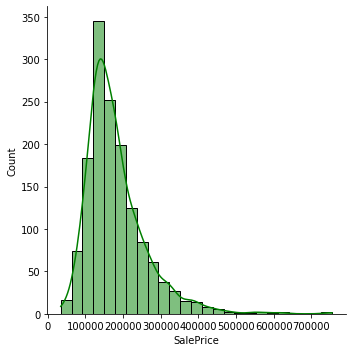

In [ ]:
#displot for saleprice
sns.displot(df.SalePrice,kde=True,color='green',bins=25)

1. the variable is heavily skewed to the right.
2. most houses 100k to 200k.
3. We can observe in above graph that the maximimum sold houses are fallen under the price range of 100000-200000.
4. We also observe that houses ranging from 500000-700000 were sold minimum.

In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
px.box(df,x='OverallQual',y='SalePrice')

1.   We can observe from above boxplot that houses having excellent material quality and finshing were sold at the maximum cost.

2. We also observe that houses with very poor and poor quality were sold at minimum price range.

In [ ]:
px.box(df,x='OverallCond',y='SalePrice')

1.   house with higher over all condition sell for higher price
2.   interestingly the houses with medium overall condition have maximum range of prceand also higher average price.



In [ ]:
px.pie(df,names='Neighborhood')

In [ ]:
px.histogram(df,x='SalePrice',color='LandContour',histfunc='avg')

In [ ]:
px.box(df,y='SalePrice',color='LandContour',points=False)

In [ ]:
#create a profile report
profile=ProfileReport(df)
profile.to_file('Report.html')

Summarize dataset:   0%|          | 0/94 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/pandas_profiling/model/correlations.py:139: UserWarning:

There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'No data; `observed` has size 0.')



Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# New Section

In [ ]:
#Basic and Conditional probability
#what is the probability of picking a house in oldtown
total_houses=df.shape[0]
house_in_oldtown=df[df.Neighborhood=='OldTown'].shape[0]
probability=(house_in_oldtown/total_houses)*100
print(round(probability,2))

7.74


In [ ]:
conditional_probability=(house_in_oldtown/total_houses)*((house_in_oldtown -1)/(total_houses -1))
print(round(conditional_probability*100,3))

0.594


Simple Probability Distribution
Lets Take an example, that we throw a dice of containing six faces.
so, there are Total no. of Combinations = 6*6 = 36
Let’s see how:

2 {(1,1)} => 1/36

3 {(1,2),(2,1)} => 2/36

4 {(2,2),(3,1),(1,3)} => 3/36

5 {(1,4),(4,1),(2,3),(3,2)} => 4/36

6 {(3,3),(1,5),(5,1),(2,4),(4,2)} => 5/36

7 {(1,6),(6,1),(2,5),(5,2),(3,4),(4,3)} => 6/36

8 {(2,6),(6,2),(3,5),(5,3),(4,4)} => 5/36

9 {(3,6),(6,3),(5,4),(4,5)} => 4/36

10 {(4,6),(6,4),(5,5)} => 3/36

11 {(5,6),(6,5)} => 2/36

12 {(6,6)} = > 1/36

***Inference***

---



Inference
Sample Mean and population Mean
Let's consider a sample of 500 houses at random from 1460 houses and plot it's mean
But the mean of these 500 houses can be near or pretty far away from the mean of the 1460 houses calculated earlier.
Central Limit Theorem
The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population then the distribution of the sample means will be approximately normally distributed.

Explanation
Suppose we are interested in estimating average height of a population. We can not measure every person height in the given population. We take a sample from the given population. But when we take the sample 2 important things should be noted, 1. Sample size and 2. Distribution of sample.

The central limit theorem says, if we take the sample in significantly large size, the mean of the sample will be normally distributed. For instance, let us assume the sample size as N to be 3, which means we take 3 data points randomly as groups from the given population data such as [155, 160, 171], [152, 168, 164], [172, 151, 154], and so on. Suppose we collect 1000 such groups from the population and calculate average of every group, we will have 1000 averages. When we plot this 1000 average data we will have a distribution as a normal distribution.

Importance of Central Limit Theorem
Signifies the importance of Sample size

No matter what the distribution of population, the shape of sample distribution becomes normal when the sample size (N) increases.

Important for Inferential Statistical Analysis

Creating a varaible and storing sales price data

In [ ]:
#population distribution of Saleprice
df_SalePrice=df.SalePrice
df_SalePrice.mean()

180921.19589041095

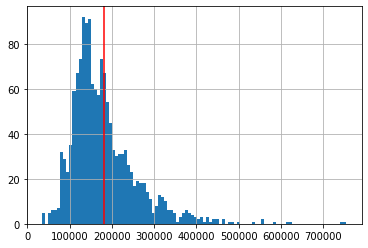

In [ ]:
plt.grid()
plt.hist(df_SalePrice,bins=100)
plt.axvline(x=df_SalePrice.mean(),color='r')

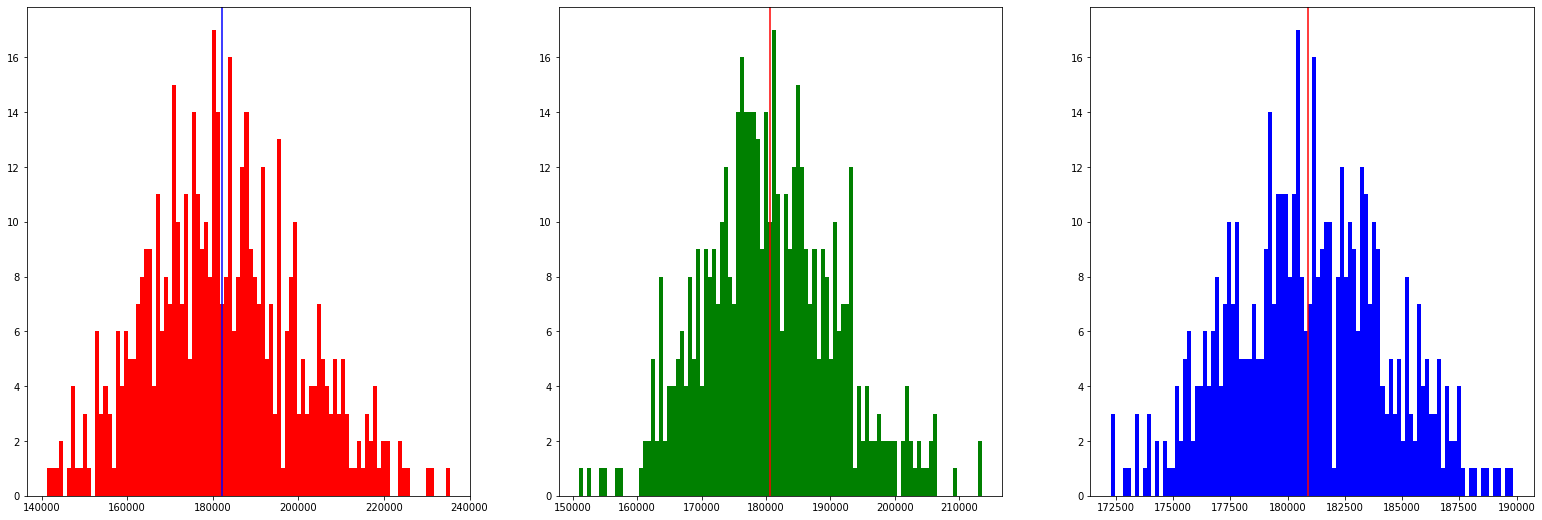

In [ ]:
#Sampling Distribution by taking sample size 20,60,500
array1=[]
array2=[]
array3=[]
n=500
for i in range(1,n):
  array1.append(df_SalePrice.sample(n=20,replace=True).mean())
  array2.append(df_SalePrice.sample(n=60,replace=True).mean())
  array3.append(df_SalePrice.sample(n=500,replace=True).mean())
#plot these arrays as sampling distributions#
fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(27,9))
#plot.subplots(311)
ax1.hist(array1,bins=100,color='r')
ax1.axvline(x=np.mean(array1),color='b')
#plot.subplots(312)
ax2.hist(array2,bins=100,color='g')
ax2.axvline(x=np.mean(array2),color='r')
#plot.subplots(313)
ax3.hist(array3,bins=100,color='b')
ax3.axvline(x=np.mean(array3),color='r')

In [ ]:
#95%confidece interval for the mean saleprice using a sample size of 1000
import math
import scipy
np.random.seed(20)
sample_size=1000
sample=np.random.choice(a=df.SalePrice, size=sample_size)
sample_mean=sample.mean()
critical_value=stats.norm.ppf(q=0.95)
pop_std=df.SalePrice.std()
#pop_mean=df.SalePrice.mean()
error=critical_value*(pop_std/math.sqrt(sample_size))
conf_int=(sample_mean-error,sample_mean+error)
conf_int

(179200.97301966674, 187465.35098033329)

Download the Dataset from Dropbox

In [17]:
!wget https://www.dropbox.com/s/f1x86l7xkdkz6ke/Admission_Predict.csv

--2021-04-15 07:51:28--  https://www.dropbox.com/s/f1x86l7xkdkz6ke/Admission_Predict.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/f1x86l7xkdkz6ke/Admission_Predict.csv [following]
--2021-04-15 07:51:28--  https://www.dropbox.com/s/raw/f1x86l7xkdkz6ke/Admission_Predict.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9545e2fe5f77df35b2039138b8.dl.dropboxusercontent.com/cd/0/inline/BMrG42CrDAeVMhhgdMHoqxSxnyAdKWvxPY7qUmfhR1s98h3psFZNpShWzwGwx8y-l3rlK-GS2kPbVvj_H9i9e7V5_8tlQjaxydD5nvYthmcF0LPAQfQSzwi96wjXxnhHzFmIA2PCnkO7gr3AtNbG2voS/file# [following]
--2021-04-15 07:51:28--  https://uc9545e2fe5f77df35b2039138b8.dl.dropboxusercontent.com/cd/0/inline/BMrG42CrDAeVMhhgdMHoqxSxnyAdKWvxPY7qUmfhR1s98h3psFZNpShWzwGwx8y

Import Required Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Load and Analyze the Dataset

In [99]:
df=pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Analyze the dataset using Pandas Profiling and Sweetviz

In [97]:
!pip install pandas-profiling==2.7.1 

In [100]:
#Generating a Pandas Profiling Report 

import pandas_profiling
from pandas_profiling import ProfileReport
report = ProfileReport(df)
report.to_file(output_file='output.html')


OSError: ignored

In [95]:
!pip install sweetviz

In [57]:
# Importing sweetviz
import sweetviz as sv
#Analyzing the dataset
report = sv.analyze(df)
#Display the report
report.show_html('Admissions.html')

AttributeError: ignored

make list of columns

In [21]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

drop unwanted columns(like serial no)

In [22]:
df.drop('Serial No.',axis=1,inplace=True)

In [23]:
df.shape

(500, 8)

In [24]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

get the descriptives

In [25]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


check for null values

In [26]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

corrupt character

In [27]:
df[~df.applymap(np.isreal).all(1)]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


group by university ranking 

In [28]:
df.groupby('University Rating').median()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,301.5,99.0,2.0,2.25,7.740,0.0,0.57
2,309.0,104.0,2.5,3.00,8.170,0.0,0.64
3,316.0,106.0,3.5,3.50,8.545,1.0,0.72
4,325.0,111.0,4.0,4.00,9.020,1.0,0.82
5,330.0,114.0,4.5,4.50,9.300,1.0,0.91


Visualize of distributions

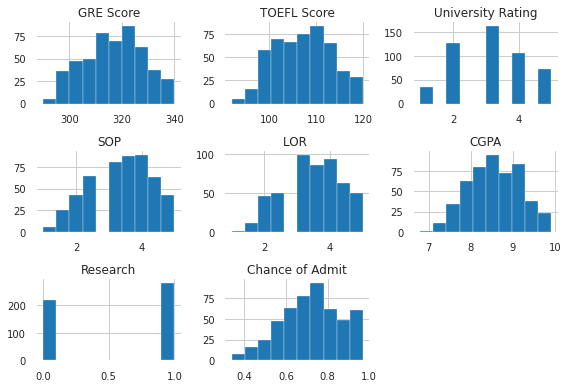

In [ ]:
df.hist()
plt.tight_layout()

visualize the distribution using plotly

In [ ]:
plt.figure(figsize=(12,8))
for col in df.columns:
  fig=px.histogram(df,x=col)
  fig.show()

<Figure size 864x576 with 0 Axes>

visualize the paiwise relationship

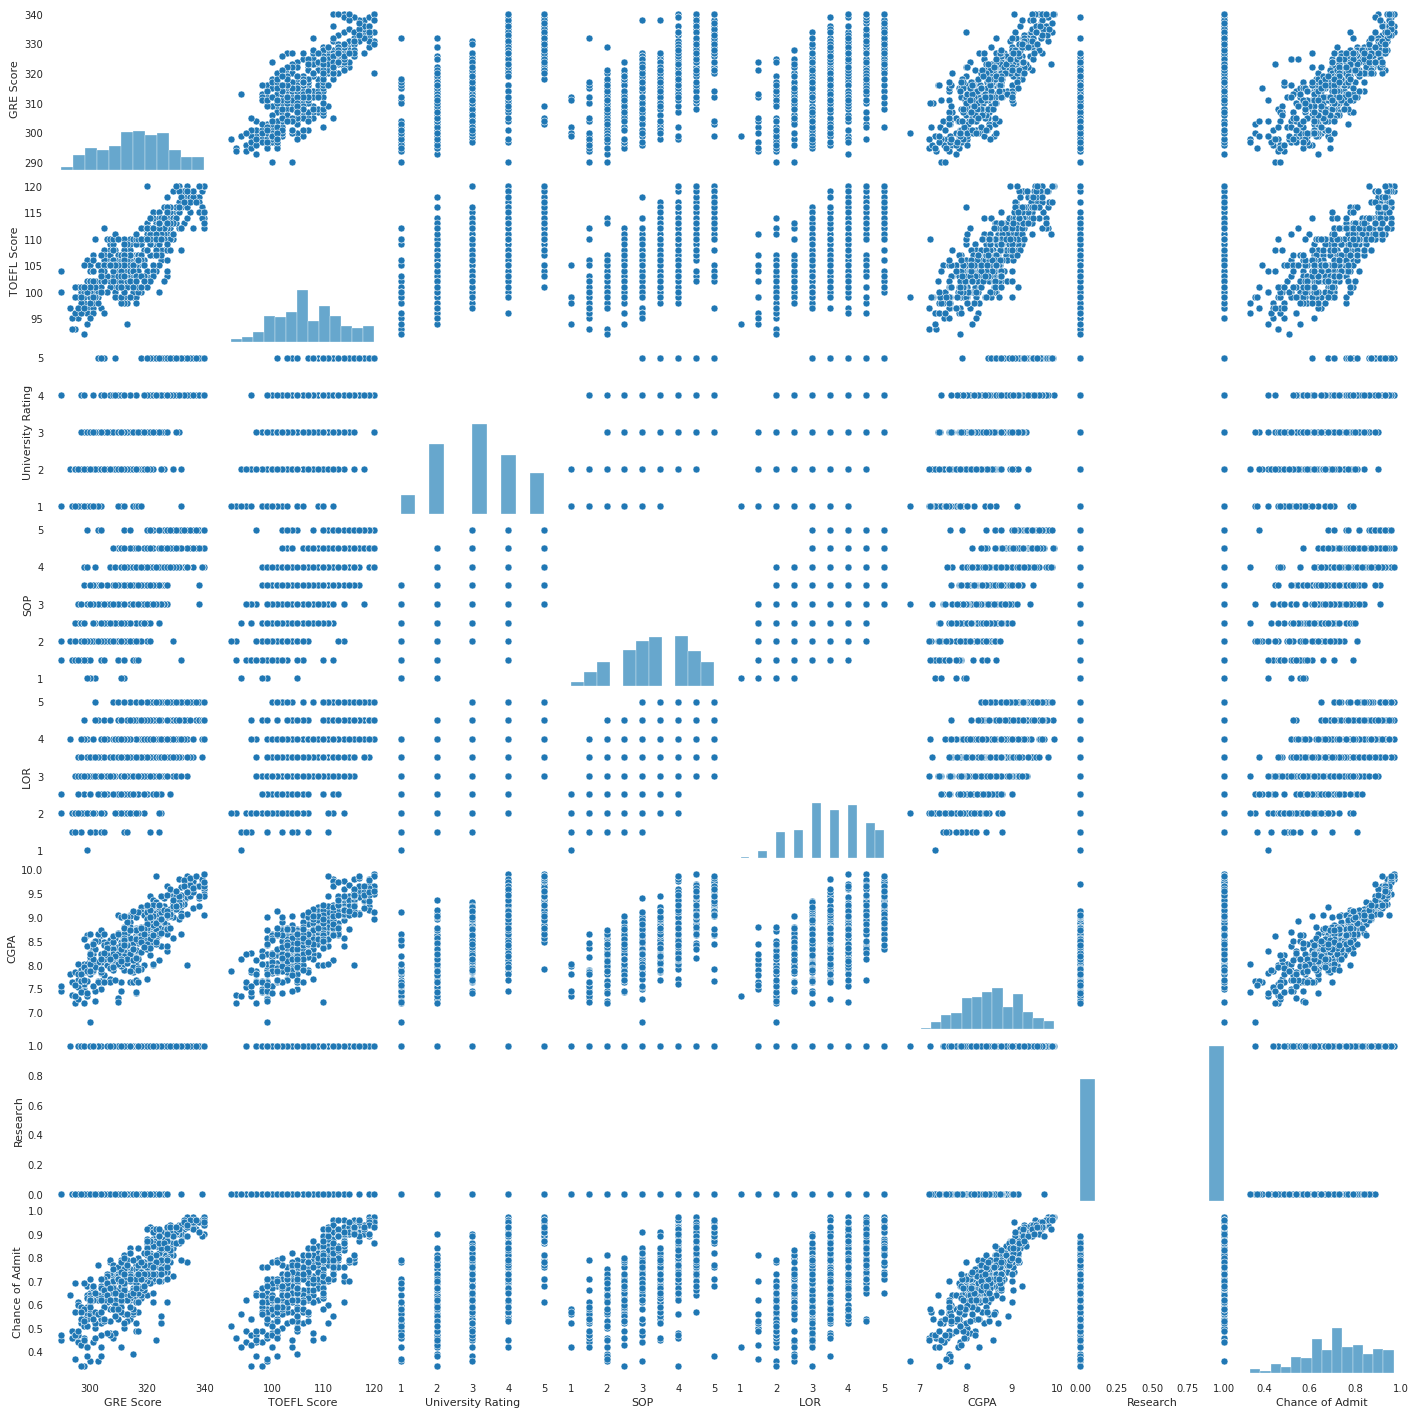

In [ ]:
sns.pairplot(df)
plt.show()

Observations:

Higher GRE Score, TOEFL Score, SOP, LOP, CGPA, Research Experience have higher chances of getting an Admit

Simple Linear Regression
We obtain a relationship between 2 variables x & y by predicting the value of y based on x

x - Independent Variable

y - Dependent Variable (Target Variable/ Output Variable)

It is called Simple Linear Regression because it examines relationship between 2 variables only

Why Linear?

When the Independent Variable increases (or decreases), the dependent variable increases or decreases in a Linear Fashion

In [31]:
x=df['GRE Score']
y=df['Chance of Admit']

convert the feature and label to numpy arrays and print their shape

In [32]:
x=np.array(x)
y=np.array(y)
x.shape,y.shape


((500,), (500,))

reshape the data


In [33]:
x=x.reshape(-1,1)
y=y.reshape(-1,1)
x.shape,y.shape


((500, 1), (500, 1))

scaling the data

In [65]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
y=scaler.fit_transform(y)


train test split


In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)


(400, 7) (400, 1) (100, 7) (100, 1)


building a simple linear regression model

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)
lr_model.score(x_test,y_test)


0.7664048993199386

In [72]:
from sklearn.metrics import r2_score
r2_score(y_train, y_test,sample_weight=None,multioutput='100')

ValueError: ignored

Oh. We could achieve an Accuracy of just 58.6% on the testing data using a Simple Linear Regression Model which is very bad

Let us check the correlation between the variables to understand how they affect the target variable (i.e., Chance of Admit)

Pandas df.corr() is used to find the pairwise correlation of all columns in the dataframe

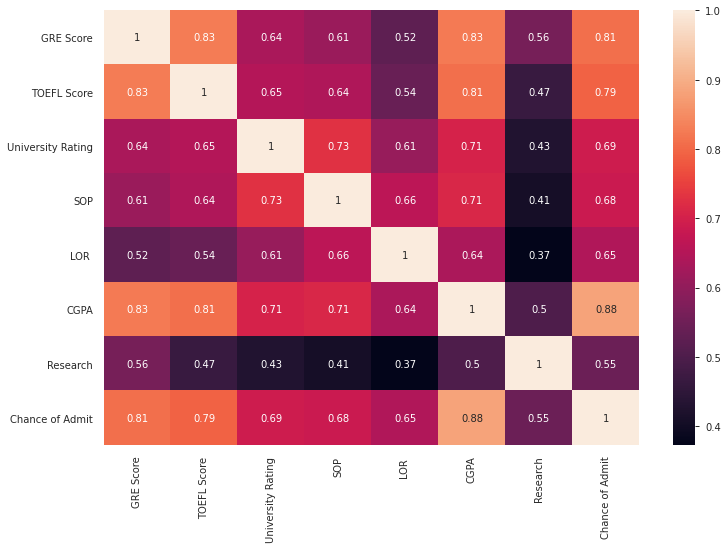

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

Observations:

Students who have High GRE Score tend to also have high TOEFL Score. That means they are positively correlated
CGPA & TOEFL Score and Chance of Admit is also highly correlated which suggests that CGPA & TOEFL Score are very important factors


Now, let us try using multiple features (for e.g. GRE Score, TOEFL Score, SOP, LOR, CGPA, etc.) to predict the Chance of Admit using Multiple Linear Regression

Multiple Linear Regression
Examines relationship between more than 2 variables

Whoa! This is what we are going to use because we have many dependent variables such as GRE Score, TOEFL Score, etc and one independent(or target varible) Chance of Admit

Multiple linear regression

Examines relationship between more than 2 variables

Whoa! This is what we are going to use because we have many dependent variables such as GRE Score, TOEFL Score, etc and one independent(or target varible) Chance of Admit

In [38]:
x=df.drop(columns=['Chance of Admit'])
y=df['Chance of Admit']
print(x.shape,y.shape)

(500, 7) (500,)


In [39]:
print(type(x),type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [40]:
x=np.array(x)
y=np.array(y)
print(x.shape,y.shape)

(500, 7) (500,)


In [41]:
y=y.reshape(-1,1)
print(y.shape)

(500, 1)


#### **Scaling the data**

In [153]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

#### **Splitting the data using the train_test_split function from the sklearn library**

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(400, 7) (100, 7) (400, 1) (100, 1)


#### **Task 7: Train & Evaluate a Linear Regression Model**

In [45]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)
lr_model.score(x_test,y_test)

0.8208741703103739

Okay, good! We achieved an Accuracy of 81% on the testing data using a Multiple Linear Regression Model.

Canada Capital

In [4]:
!wget https://www.dropbox.com/s/9qhb97j4fcpz0rk/canada_per_capita_income.csv

--2021-04-15 07:28:46--  https://www.dropbox.com/s/9qhb97j4fcpz0rk/canada_per_capita_income.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/9qhb97j4fcpz0rk/canada_per_capita_income.csv [following]
--2021-04-15 07:28:46--  https://www.dropbox.com/s/raw/9qhb97j4fcpz0rk/canada_per_capita_income.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc68871ad884b0d0c239e04db6e1.dl.dropboxusercontent.com/cd/0/inline/BMrLfi02rgRlJH8cTVORcsCeN5Lp0NIqwPQF5D8rlujKQa8Ez4r3Oe8Q4cKx4XNxio6nCHvMoUq5-x8uXXbwFsJLBAN3qJkAWWTX7CPf4tdR-vPwjYyPNJ9rSwl3hsoXBpokGAHAYb0tPPvA4qjQgODk/file# [following]
--2021-04-15 07:28:46--  https://uc68871ad884b0d0c239e04db6e1.dl.dropboxusercontent.com/cd/0/inline/BMrLfi02rgRlJH8cTVORcsCeN5Lp0NIqwPQF5D8rlu

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt


In [73]:
df= pd.read_csv('canada_per_capita_income.csv')
df.head()
df.tail()

,year,per capita income (US$)
42,2012,42665.25597
43,2013,42676.46837
44,2014,41039.89360
45,2015,35175.18898
46,2016,34229.19363


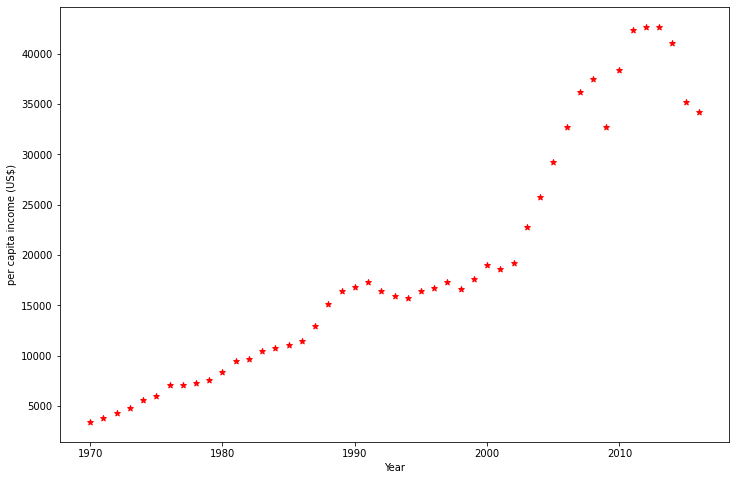

In [6]:
plt.figure(figsize=(12,8 ))

plt.scatter(df.year,df['per capita income (US$)'],color='red',marker='*')
plt.xlabel('Year')
plt.ylabel('per capita income (US$)')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



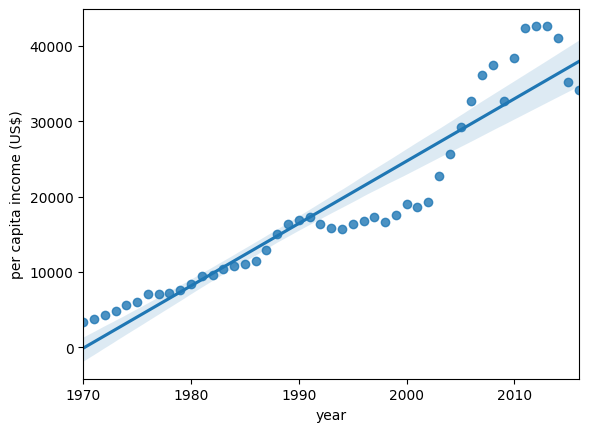

In [78]:
sns.regplot(df.year,df['per capita income (US$)'])

In [79]:
x=df.drop('per capita income (US$)',axis='columns')
x.head()

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [80]:
y=df['per capita income (US$)']
y.head()

0    3399.299037
1    3768.297935
2    4251.175484
3    4804.463248
4    5576.514583
Name: per capita income (US$), dtype: float64

In [81]:
lin_reg=linear_model.LinearRegression()
lin_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### **Evaluate the Model**

In [82]:
lin_reg.score(x,y)



0.890916917957032

In [84]:
lin_reg.predict([[2025]])

array([45431.01947053])

In [13]:
lin_reg.predict([[2021]])

array([42117.15916964])

In [15]:
lin_reg.predict([[2031]])

array([50401.80992187])

Explore the data to predict who is more likely to click the ad! using Logistic Regression based on the features of the user

###Dataset Description

The dataset contains the following attributes:

Daily Time Spent on Site - Consumer time on site in minutes
Age - Cutomer age in years
Area Income - Avg. Income of geographical area of consumer
Daily Internet Usage - Avg. minutes a day consumer is on the internet
Ad Topic Line - Headline of the advertisement
City - City of consumer
Male - Whether or not consumer was male
Country - Country of consumer
Timestamp - Time at which consumer clicked on Ad or closed window
Clicked on Ad - 0 or 1 indicated clicking on Ad
###Tasks to be performed

Import Required Libraries and analyze the dataset

 Check the shape of the dataset
 Check and deal with the Null Values present in the dataset
 Analyze the dataset using Pandas Profiling and Sweetviz
Perform Data Visualization on the dataset Using Plotly Express

Split the dataset using train_test_split from the sklearn library

Build a Logistic Regression model and fit the model

Evaluate the Model

 Use a Confusion Matrix and write your observations
 Check the accuracy_score
 Print a classification report
###Task 1: Import Required Libraries and analyze the dataset

   Check the shape of the dataset
   Check and deal with the Null Values present in the dataset
   Analyze the dataset using Pandas Profiling and Sweetviz

In [1]:
!wget https://www.dropbox.com/s/3u5l88jokdaj1wu/advertising.csv

--2021-04-16 09:23:28--  https://www.dropbox.com/s/3u5l88jokdaj1wu/advertising.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3u5l88jokdaj1wu/advertising.csv [following]
--2021-04-16 09:23:29--  https://www.dropbox.com/s/raw/3u5l88jokdaj1wu/advertising.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca08be816a691d7bff45b50f081.dl.dropboxusercontent.com/cd/0/inline/BMuJ8sst9Q5YSVz3HDKFfa_mzp5rBdOQpW5EAOP_ojNs1IiDwKHGybCrPhlLi7SV5AMnWd2QEu8VqLeIReGjf6XFn7MFJIheAYvB5u4lwroH1DpNaoAR20jT2KFYqsZuFqrU2RaU-niqvjRg9gbolqPU/file# [following]
--2021-04-16 09:23:29--  https://uca08be816a691d7bff45b50f081.dl.dropboxusercontent.com/cd/0/inline/BMuJ8sst9Q5YSVz3HDKFfa_mzp5rBdOQpW5EAOP_ojNs1IiDwKHGybCrPhlLi7SV5AMnWd2QEu8VqL

In [5]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [6]:
data = pd.read_csv('advertising.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [7]:
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [89]:
data.shape

(1000, 10)

In [91]:
data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [101]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
Area Income,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
Daily Internet Usage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00


In [1]:
!pip install pandas-profiling==2.7.1 

     |████████████████████████████████| 256kB 8.4MB/s 
     |████████████████████████████████| 1.1MB 12.3MB/s 
     |████████████████████████████████| 81kB 9.6MB/s 
     |████████████████████████████████| 3.2MB 27.4MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
     |████████████████████████████████| 296kB 37.4MB/s 
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=5c35242603820a4b34475565c36913785f98814509e599cab0c6ee7377f910bd
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=fca5e3df5aca5a97caa8e2ab92b745fd49e6f0ba98637bdd6c401ed7454d7338
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built phik htmlmin
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
  Found existing in

In [7]:
import pandas_profiling
from pandas_profiling import ProfileReport
prof = ProfileReport(data)
prof.to_file(output_file='intusage.html')

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
!pip install sweetviz

     |████████████████████████████████| 15.1MB 322kB/s 


In [10]:
import sweetviz as sv
report=sv.analyze(data)
report.show_html('Ad-Click.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Ad-Click.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [11]:
data.shape

(1000, 10)

In [13]:
data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [17]:
data[~data.applymap(np.isreal).all(1)]


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [18]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
Area Income,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
Daily Internet Usage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00


In [23]:
px.histogram(data,x='Age')

In [25]:
px.bar(data, x='Age',y='Daily Internet Usage')

In [28]:
px.scatter(x=data.Age,y=data['Daily Time Spent on Site'],labels={'x':'Age', 'y':'Daily Time Spent on Site'})


In [11]:
from sklearn.model_selection import train_test_split
x = data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage','Male']]
y = data['Clicked on Ad']

x.shape
y.shape


(1000,)

In [14]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size =  0.4, random_state= 42)
print(train_x.shape,train_y.shape)

(600, 5) (600,)


In [16]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
lr_model.score(test_x,test_y)

0.895

In [18]:
pred= lr_model.predict(test_x)
pred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,

In [19]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
confusion_matrix(test_y,pred)

array([[181,  10],
       [ 32, 177]])

In [60]:
accuracy_score(test_y,pred)

0.895

In [21]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       191
           1       0.95      0.85      0.89       209

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.89       400
weighted avg       0.90      0.90      0.89       400



Precision: Ability of a classifier not to label an instance positive that is actually negative. For each class, it is defined as the ratio of true positives (TP) to the sum of a true positive (TP) and false positive (FP).

Precision = TP/(TP + FP)

Recall: Ability of a classifier to find all positive instances. For each class, it is defined as the ratio of true positives (TPs) to the sum of true positives (TPs) and false negatives (FNs).

Recall = TP/(TP+FN)

f1-score: A weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. F1 scores are lower than accuracy measures

Support: Support is the number of actual occurrences of the class in the specified dataset



In [25]:
from sklearn.datasets import load_digits
digits=load_digits()
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [26]:
from sklearn.model_selection import train_test_split
x=digits.data
y=digits.target
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.2,random_state=40)

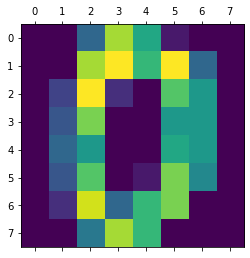

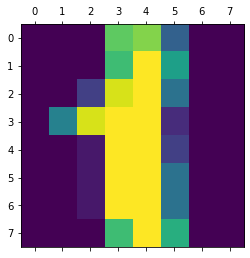

In [27]:
for i in range(2):
  plt.matshow(digits.images[i])

In [30]:
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)


In [31]:
from sklearn.linear_model import LogisticRegression
lg_model=LogisticRegression()


In [32]:
lg_model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
lg_model.score(x_test,y_test)

0.9638888888888889

In [37]:
digits.target[30]

0

In [52]:
lg_model.predict([digits.data[2]])

array([2])

In [48]:
y_pred=lg_model.predict(x_test)
y_pred

array([8, 1, 9, 0, 3, 3, 2, 7, 9, 9, 0, 4, 0, 6, 7, 6, 7, 3, 5, 0, 9, 8,
       3, 2, 0, 6, 4, 1, 9, 5, 5, 8, 4, 2, 6, 4, 8, 9, 7, 5, 5, 9, 8, 4,
       2, 2, 3, 5, 0, 0, 1, 9, 1, 9, 1, 2, 6, 4, 5, 1, 8, 4, 8, 0, 7, 6,
       3, 9, 4, 4, 3, 2, 7, 4, 7, 6, 2, 9, 5, 4, 1, 8, 9, 1, 2, 4, 3, 4,
       3, 1, 2, 5, 0, 0, 7, 1, 1, 6, 7, 0, 8, 2, 5, 4, 1, 5, 2, 9, 2, 1,
       4, 4, 4, 8, 9, 6, 6, 3, 6, 7, 1, 8, 8, 3, 7, 6, 2, 1, 1, 2, 9, 8,
       4, 9, 9, 3, 7, 7, 6, 9, 1, 6, 2, 4, 5, 8, 0, 5, 4, 4, 3, 2, 7, 9,
       7, 6, 2, 2, 9, 7, 2, 6, 6, 5, 2, 1, 8, 8, 7, 4, 3, 8, 9, 4, 1, 7,
       6, 1, 1, 0, 4, 4, 8, 1, 4, 0, 0, 7, 3, 0, 7, 9, 0, 1, 0, 3, 0, 9,
       6, 8, 6, 8, 1, 0, 1, 8, 3, 4, 7, 6, 9, 9, 8, 8, 4, 1, 6, 5, 5, 1,
       1, 3, 9, 6, 2, 3, 6, 2, 6, 6, 8, 4, 1, 8, 9, 8, 6, 3, 2, 5, 1, 3,
       2, 0, 1, 0, 1, 1, 9, 6, 6, 9, 9, 4, 3, 6, 0, 9, 2, 9, 4, 7, 7, 8,
       1, 3, 7, 6, 9, 4, 2, 7, 7, 8, 5, 7, 7, 1, 5, 3, 3, 5, 9, 8, 5, 4,
       9, 0, 4, 8, 7, 3, 7, 6, 8, 6, 8, 2, 2, 0, 8,

In [43]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[30,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  1,  0,  2,  0,  0,  0,  1,  2],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  1,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  1,  0, 34,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 39]])

In [41]:
!wget https://www.dropbox.com/s/1od9qelthu5834q/StockX-Data-Contest-2019-3.csv?dl=0

--2021-04-17 16:17:18--  https://www.dropbox.com/s/1od9qelthu5834q/StockX-Data-Contest-2019-3.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/1od9qelthu5834q/StockX-Data-Contest-2019-3.csv [following]
--2021-04-17 16:17:18--  https://www.dropbox.com/s/raw/1od9qelthu5834q/StockX-Data-Contest-2019-3.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdd44a0939615bc586ae165902e.dl.dropboxusercontent.com/cd/0/inline/BMxQQHx0Md4GpxMEL705st6UW8MG7wjobflwmpUvM_kX2zgKmlGRnX47447Z5iKBYsbir_xi-cLMCC5vtMVGyD9518WiotMtprw7YaDg7rgBFa5hRwPZanaQ8kNkOdbQkOGdaebMQFxtfMqm8j1yMQgL/file# [following]
--2021-04-17 16:17:18--  https://ucdd44a0939615bc586ae165902e.dl.dropboxusercontent.com/cd/0/inline/BMxQQHx0Md4GpxMEL705st6UW8MG7wj

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
data = pd.read_csv('StockX-Data-Contest-2019-3.csv?dl=0.1')
data.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,01-09-2017,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,24-09-2016,11.0,California
1,01-09-2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,23-11-2016,11.0,California
2,01-09-2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,23-11-2016,11.0,California
3,01-09-2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,23-11-2016,11.5,Kentucky
4,01-09-2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,11-02-2017,11.0,Rhode Island


###Tasks to be performed:

1. Lets look at the data, and do some sanity check
2.Handle data-types
3.Let us have a look at all the features
4.Handle Outlier data
5.Convert datetime data to numerical data
6.Convert categorical data to numerical data
7.Split data for training and testing
8.Create and evaluate those linear models

Lets look at the data, and do some sanity check

In [12]:
data.columns

Index(['Order Date', 'Brand', 'Sneaker Name', 'Sale Price', 'Retail Price',
       'Release Date', 'Shoe Size', 'Buyer Region'],
      dtype='object')

In [13]:
data.shape

(99956, 8)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    99956 non-null  object 
 1   Brand         99956 non-null  object 
 2   Sneaker Name  99956 non-null  object 
 3   Sale Price    99956 non-null  object 
 4   Retail Price  99956 non-null  object 
 5   Release Date  99956 non-null  object 
 6   Shoe Size     99956 non-null  float64
 7   Buyer Region  99956 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


We can see there are no null values.

The data type of values in column 'Order Date' and 'Release Date' are string objects, so we will need to convert it into type DateTime

The data type of values in column 'Sale Price' and 'Retail Price' are also string objects. They should be converted to float,
But the prices contain the dollar sign(' ′)𝑎𝑛𝑑′,′𝑓𝑜𝑟𝑒𝑥𝑎𝑚𝑝𝑙𝑒′ 1,300' so we will need to remove it.

But before we remove it, first check if all the prices are in dollars or not.

The data type of values in column 'Order Date' and 'Release Date' are string objects, so we will need to convert it into type DateTime

###Task 2: Handle Data-types

In [44]:
data['Order Date']=data['Order Date'].astype('datetime64')
data['Release Date']=data['Release Date'].astype('datetime64')
data.info('Order Date')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    99956 non-null  datetime64[ns]
 1   Brand         99956 non-null  object        
 2   Sneaker Name  99956 non-null  object        
 3   Sale Price    99956 non-null  float64       
 4   Retail Price  99956 non-null  float64       
 5   Release Date  99956 non-null  datetime64[ns]
 6   Shoe Size     99956 non-null  float64       
 7   Buyer Region  99956 non-null  object        
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 6.1+ MB


first check if all the prices are in dollars or not.

In [18]:
print(data['Sale Price'][data['Sale Price'].str.startswith('$')].size)
print(data['Retail Price'][data['Retail Price'].str.startswith('$')].size)

99956
99956


The data type of values in column 'Sale Price' and 'Retail Price' are also string objects. They should be converted to float, But the prices contain the dollar sign(' ′)𝑎𝑛𝑑′,′𝑓𝑜𝑟𝑒𝑥𝑎𝑚𝑝𝑙𝑒′ 1,300' so we will need to remove it.

In [43]:
import re
data['Sale Price']=data['Sale Price'].apply(lambda x: float(re.sub(r'[^\d.]','',x)))
data['Retail Price']=data['Retail Price'].apply(lambda x: float(re.sub(r'[^\d.]','',x)))

In [24]:
data['Sale Price'].head(5)

0    1097.0
1     685.0
2     690.0
3    1075.0
4     828.0
Name: Sale Price, dtype: float64

We can see the prices has been converted to float

###Task 3: Lets have a look at all the features


Lets check the feature 'Brand'

In [25]:
data['Brand'].unique()

array([' Yeezy', 'Off-White'], dtype=object)

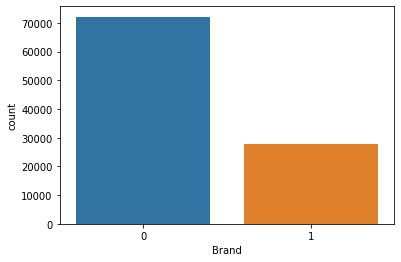

In [47]:
sns.countplot(x=data['Brand'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


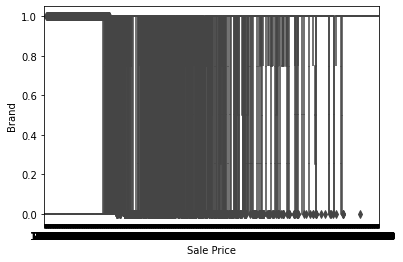

In [48]:
sns.boxplot(data['Sale Price'],data['Brand'])

We can see the Sale Price is generally higher of brand Off-White than Yeezy.

Lets convert the feature 'Brand' to numerical feature

In [45]:
b={' Yeezy':0,'Off-White':1}
data['Brand']=data['Brand'].map(b)
data.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-01-09,0,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220.0,2016-09-24,11.0,California
1,2017-01-09,0,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220.0,2016-11-23,11.0,California
2,2017-01-09,0,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220.0,2016-11-23,11.0,California
3,2017-01-09,0,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220.0,2016-11-23,11.5,Kentucky
4,2017-01-09,0,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220.0,2017-11-02,11.0,Rhode Island


Lets check the feature Sneaker Name

In [50]:
print(data['Sneaker Name'].nunique())
print(data['Sneaker Name'].unique())

50
['Adidas-Yeezy-Boost-350-Low-V2-Beluga'
 'Adidas-Yeezy-Boost-350-V2-Core-Black-Copper'
 'Adidas-Yeezy-Boost-350-V2-Core-Black-Green'
 'Adidas-Yeezy-Boost-350-V2-Core-Black-Red'
 'Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017'
 'Adidas-Yeezy-Boost-350-V2-Core-Black-White'
 'Adidas-Yeezy-Boost-350-V2-Cream-White' 'Adidas-Yeezy-Boost-350-V2-Zebra'
 'Adidas-Yeezy-Boost-350-Low-Moonrock' 'Nike-Air-Max-90-Off-White'
 'Nike-Air-Presto-Off-White' 'Nike-Air-VaporMax-Off-White'
 'Air-Jordan-1-Retro-High-Off-White-Chicago' 'Nike-Blazer-Mid-Off-White'
 'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016'
 'Adidas-Yeezy-Boost-350-Low-Oxford-Tan'
 'Adidas-Yeezy-Boost-350-Low-Turtledove'
 'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015'
 'Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow'
 'Nike-Air-Force-1-Low-Off-White' 'Nike-Air-Max-97-Off-White'
 'Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100'
 'Nike-React-Hyperdunk-2017-Flyknit-Off-White' 'Nike-Zoom-Fly-Off-White'
 'Adidas-Yeezy-Boost-350-V2-Beluga-2p

We can see some of the names are in lowercase and some are in uppercase like Adidas and adidas lets make them all lowercase

In [52]:
data['Sneaker Name']=data['Sneaker Name'].apply(lambda x: x.lower())

In [53]:
x=data[['Sale Price','Sneaker Name']].groupby('Sneaker Name').agg('mean')
x.rename(columns={'Sale Price':'Average Sale Price'},inplace=True)
x.head()

,Average Sale Price
Sneaker Name,
adidas-yeezy-boost-350-low-moonrock,996.710000
adidas-yeezy-boost-350-low-oxford-tan,1011.514286
adidas-yeezy-boost-350-low-pirate-black-2015,895.094737
adidas-yeezy-boost-350-low-pirate-black-2016,984.237705
adidas-yeezy-boost-350-low-turtledove,1531.661765


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


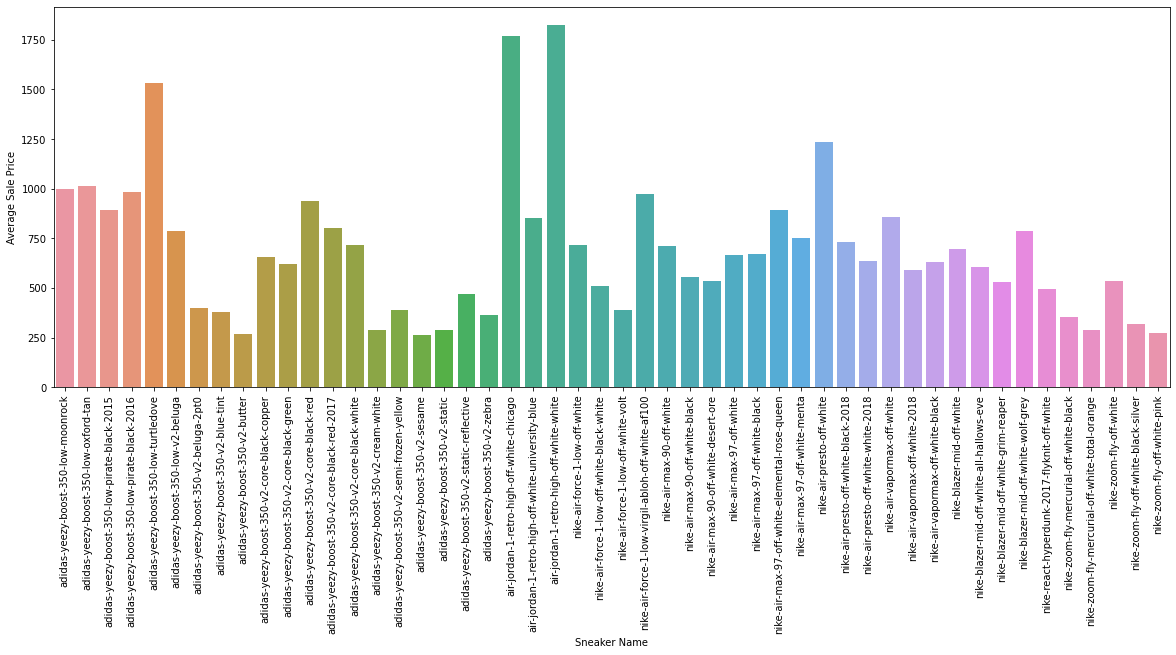

In [56]:
plt.figure(figsize=(20,7))
graph=sns.barplot(x.index,x['Average Sale Price'])
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


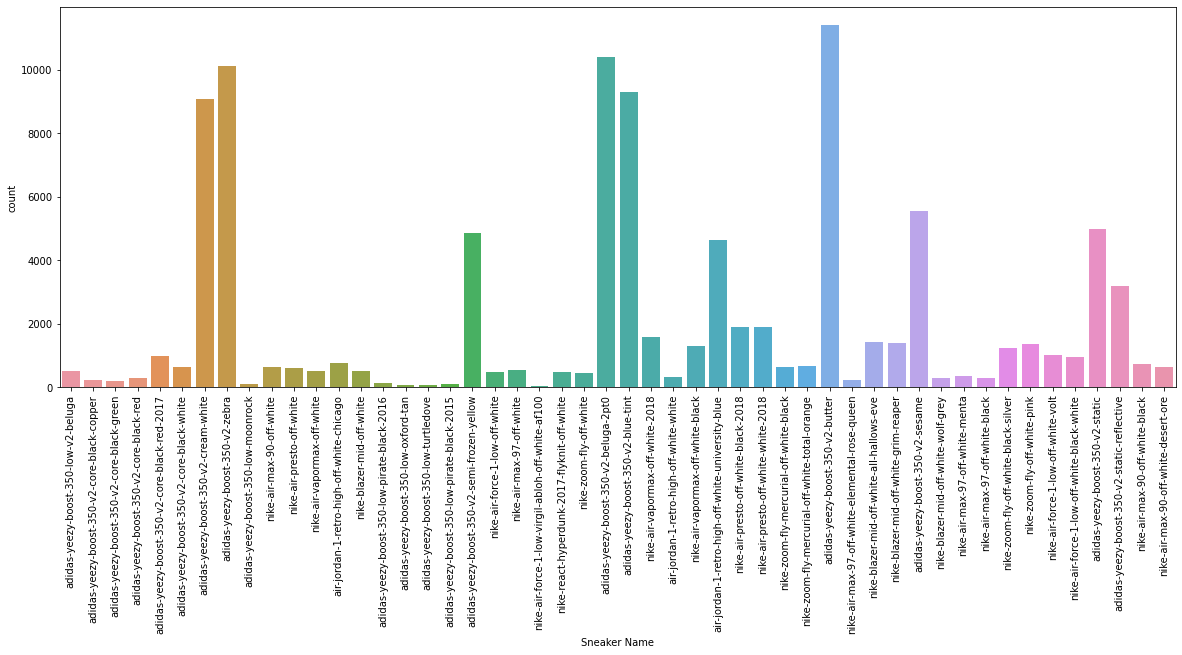

In [61]:
plt.figure(figsize=(20,7))
graphcount=sns.countplot(data['Sneaker Name'])
graphcount.set_xticklabels(graphcount.get_xticklabels(),rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


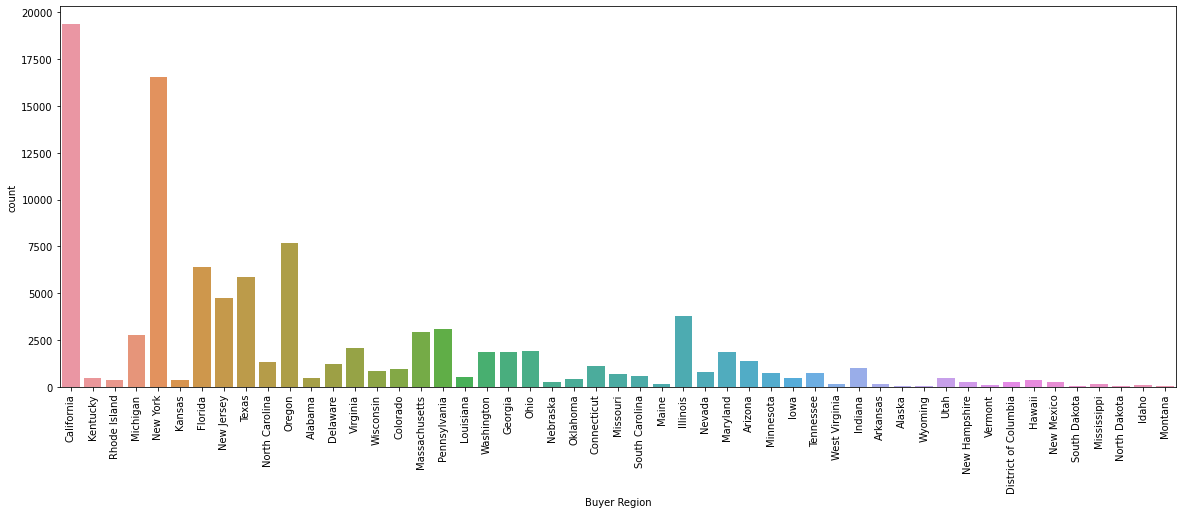

In [62]:
plt.figure(figsize=(20,7))
graphcount=sns.countplot(data['Buyer Region'])
graphcount.set_xticklabels(graphcount.get_xticklabels(),rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


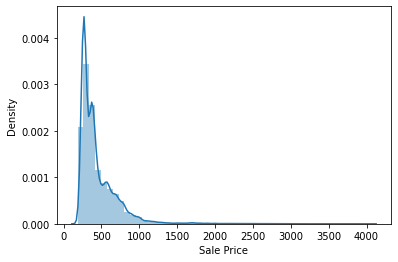

In [64]:
sns.distplot(data['Sale Price'])

It seems there are outliers. So lets check it

###Task 4: Handle outlier values

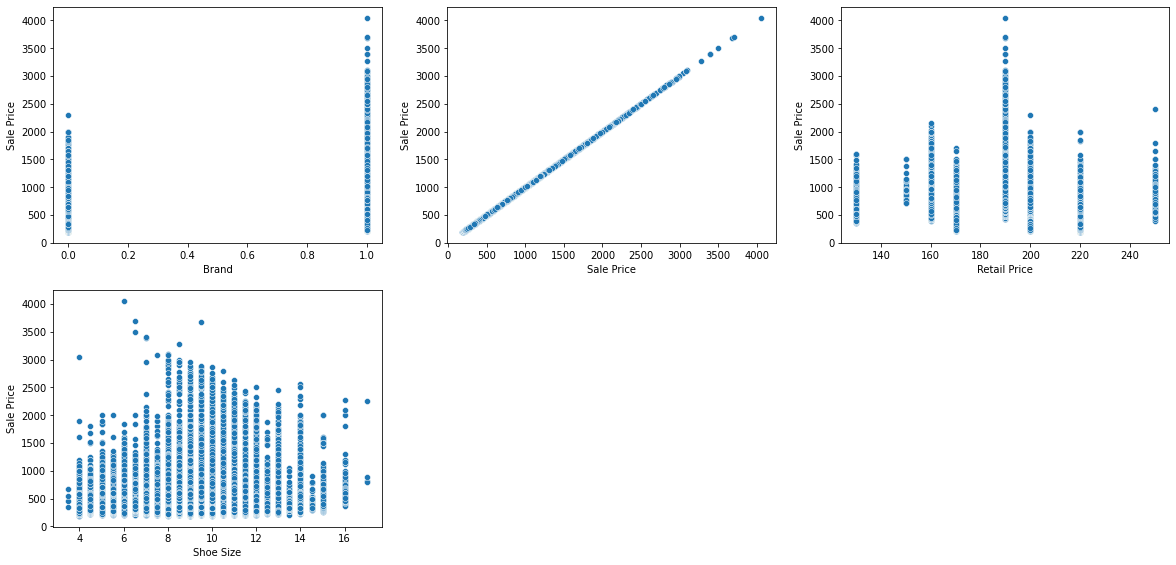

In [75]:
fig, axs=plt.subplots(ncols=3,nrows=0,figsize=(20,20))
for i,j in enumerate(data.select_dtypes(np.number).columns):
  plt.subplot(len(data.select_dtypes(np.number).columns),3,i+1)
  sns.scatterplot(x=data[j],y=data['Sale Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'adidas-yeezy-boost-350-low-v2-beluga'),
 Text(0, 0, 'adidas-yeezy-boost-350-v2-core-black-copper'),
 Text(0, 0, 'adidas-yeezy-boost-350-v2-core-black-green'),
 Text(0, 0, 'adidas-yeezy-boost-350-v2-core-black-red'),
 Text(0, 0, 'adidas-yeezy-boost-350-v2-core-black-red-2017'),
 Text(0, 0, 'adidas-yeezy-boost-350-v2-core-black-white'),
 Text(0, 0, 'adidas-yeezy-boost-350-v2-cream-white'),
 Text(0, 0, 'adidas-yeezy-boost-350-v2-zebra'),
 Text(0, 0, 'adidas-yeezy-boost-350-low-moonrock'),
 Text(0, 0, 'nike-air-max-90-off-white'),
 Text(0, 0, 'nike-air-presto-off-white'),
 Text(0, 0, 'nike-air-vapormax-off-white'),
 Text(0, 0, 'air-jordan-1-retro-high-off-white-chicago'),
 Text(0, 0, 'nike-blazer-mid-off-white'),
 Text(0, 0, 'adidas-yeezy-boost-350-low-pirate-black-2016'),
 Text(0, 0, 'adidas-yeezy-boost-350-low-oxford-tan'),
 Text(0, 0, 'adidas-yeezy-boost-350-low-turtledove'),
 Text(0, 0, 'adidas-yeezy-boost-350-low-pirate-black-2015'),
 Text(0, 0, 'adidas-yeezy-boost-350-v2

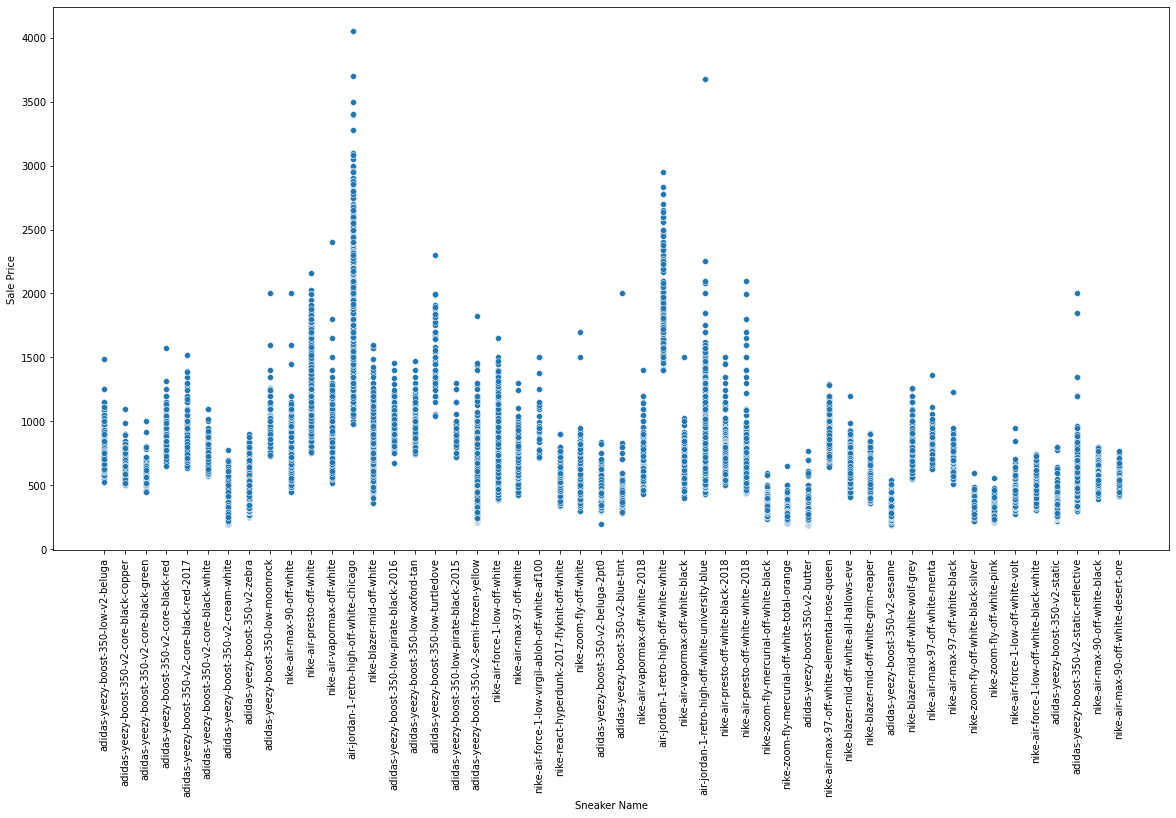

In [74]:
plt.figure(figsize=(20,10))
graph2=sns.scatterplot(data['Sneaker Name'],data['Sale Price'])
graph2.set_xticklabels(data['Sneaker Name'].unique(),rotation=90)

We can see a few shoes like Air Jordan 1 Retro High Off-White-Chicago are the reason for outliers. So lets delete all the intances with Sale Price more than $2500

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


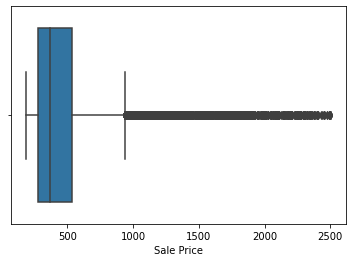

In [79]:
ind=data[data['Sale Price']>2500].index
data.drop(ind,axis=0,inplace=True)
sns.boxplot(data['Sale Price'])

In [83]:
import datetime
data['Order Date']=data['Order Date'].map(datetime.date.toordinal)
#calculates days btw 01/01/2001 and given date
data['Release Date']=data['Release Date'].map(datetime.date.toordinal)
data['Release Date'].head()

0    736231
1    736291
2    736291
3    736291
4    736635
Name: Release Date, dtype: int64

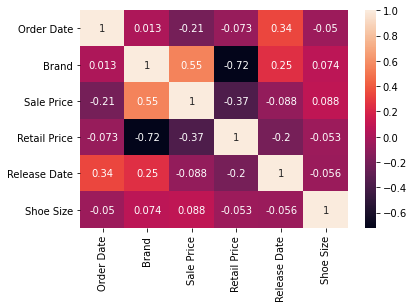

In [85]:
#correaltion 
sns.heatmap(data.corr(),annot=True)

You can see the retail price is negatively correlated with Normalise_Sale_Price, but its not True. Let me explain it to you with an example, Suppose,

shoe A is having retail price of 200 and its average sale price is 1200, and

another shoe B has retail price 300 and average Sale Price 600, and

shoe C has Retail Price 250 and average sale price 900.

Now it seems that retail price and sale price are negatively correlated but they are not. Correlation can be misleading when confounding variables are ignored.

It may be the case that shoe A was just released and thats why its price is so high, or shoe B's color is dull and that's why its price is low.

This is called Simpson's paradox


Now lets convert the categorical columns to numerical. We have 2 categorical column, one is Sneaker Name and another is Buyer Region Both are nominal data, so lets one hot encode it

###Task 6: Convert categorical data to numerical data

In [134]:
#one hot encoding categorical features
data=pd.get_dummies(data)
data.head()


,Order Date,Brand,Sale Price,Retail Price,Release Date,Shoe Size,Sneaker Name_adidas-yeezy-boost-350-low-moonrock,Sneaker Name_adidas-yeezy-boost-350-low-oxford-tan,Sneaker Name_adidas-yeezy-boost-350-low-pirate-black-2015,Sneaker Name_adidas-yeezy-boost-350-low-pirate-black-2016,Sneaker Name_adidas-yeezy-boost-350-low-turtledove,Sneaker Name_adidas-yeezy-boost-350-low-v2-beluga,Sneaker Name_adidas-yeezy-boost-350-v2-beluga-2pt0,Sneaker Name_adidas-yeezy-boost-350-v2-blue-tint,Sneaker Name_adidas-yeezy-boost-350-v2-butter,Sneaker Name_adidas-yeezy-boost-350-v2-core-black-copper,Sneaker Name_adidas-yeezy-boost-350-v2-core-black-green,Sneaker Name_adidas-yeezy-boost-350-v2-core-black-red,Sneaker Name_adidas-yeezy-boost-350-v2-core-black-red-2017,Sneaker Name_adidas-yeezy-boost-350-v2-core-black-white,Sneaker Name_adidas-yeezy-boost-350-v2-cream-white,Sneaker Name_adidas-yeezy-boost-350-v2-semi-frozen-yellow,Sneaker Name_adidas-yeezy-boost-350-v2-sesame,Sneaker Name_adidas-yeezy-boost-350-v2-static,Sneaker Name_adidas-yeezy-boost-350-v2-static-reflective,Sneaker Name_adidas-yeezy-boost-350-v2-zebra,Sneaker Name_air-jordan-1-retro-high-off-white-chicago,Sneaker Name_air-jordan-1-retro-high-off-white-university-blue,Sneaker Name_air-jordan-1-retro-high-off-white-white,Sneaker Name_nike-air-force-1-low-off-white,Sneaker Name_nike-air-force-1-low-off-white-black-white,Sneaker Name_nike-air-force-1-low-off-white-volt,Sneaker Name_nike-air-force-1-low-virgil-abloh-off-white-af100,Sneaker Name_nike-air-max-90-off-white,Sneaker Name_nike-air-max-90-off-white-black,Sneaker Name_nike-air-max-90-off-white-desert-ore,Sneaker Name_nike-air-max-97-off-white,Sneaker Name_nike-air-max-97-off-white-black,Sneaker Name_nike-air-max-97-off-white-elemental-rose-queen,Sneaker Name_nike-air-max-97-off-white-menta,...,Buyer Region_Hawaii,Buyer Region_Idaho,Buyer Region_Illinois,Buyer Region_Indiana,Buyer Region_Iowa,Buyer Region_Kansas,Buyer Region_Kentucky,Buyer Region_Louisiana,Buyer Region_Maine,Buyer Region_Maryland,Buyer Region_Massachusetts,Buyer Region_Michigan,Buyer Region_Minnesota,Buyer Region_Mississippi,Buyer Region_Missouri,Buyer Region_Montana,Buyer Region_Nebraska,Buyer Region_Nevada,Buyer Region_New Hampshire,Buyer Region_New Jersey,Buyer Region_New Mexico,Buyer Region_New York,Buyer Region_North Carolina,Buyer Region_North Dakota,Buyer Region_Ohio,Buyer Region_Oklahoma,Buyer Region_Oregon,Buyer Region_Pennsylvania,Buyer Region_Rhode Island,Buyer Region_South Carolina,Buyer Region_South Dakota,Buyer Region_Tennessee,Buyer Region_Texas,Buyer Region_Utah,Buyer Region_Vermont,Buyer Region_Virginia,Buyer Region_Washington,Buyer Region_West Virginia,Buyer Region_Wisconsin,Buyer Region_Wyoming
0,736338,0,1097.0,220.0,736231,11.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,736338,0,685.0,220.0,736291,11.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,736338,0,690.0,220.0,736291,11.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,736338,0,1075.0,220.0,736291,11.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,736338,0,828.0,220.0,736635,11.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
 from sklearn.preprocessing import OneHotEncoder

###Task 7: Split the data for training and testing

In [141]:
from sklearn.model_selection import train_test_split
x=data.drop('Sale Price',axis=1)
y=data['Sale Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((79900, 106), (19976, 106), (79900,), (19976,))

In [146]:
def plot_pred(y_train,y_train_pred,y_test_pred,y_test):
  sns.scatterplot(y_train_pred,y_train)
  sns.scatterplot(y_test_pred,y_test)
  plt.show()


###Task 8: Create different different linear models. Evaluate those models

In [143]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
lr=make_pipeline(RobustScaler(),LinearRegression())
lr.fit(x_train,y_train)
y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)

In [144]:
#mean squared error
from sklearn.metrics import mean_squared_error
print('RMSE on training Set: ',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('RMSE on testing Set: ',np.sqrt(mean_squared_error(y_test,y_test_pred)))


RMSE on training Set:  100.54315970086678
RMSE on testing Set:  98.27576344029895


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


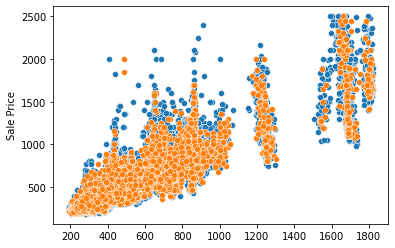

In [147]:
plot_pred(y_train,y_train_pred,y_test_pred,y_test)

We can use regularization to filter-out noise and prevent the model from over-fitting. Regularization adds additional information(bias) to penalize extreme parameter weights.

Ridge uses L2 penalized model where we take squared sum of weights and add it to the cost function

In [149]:
from sklearn.linear_model import RidgeCV,LassoCV,ElasticNetCV
ridge=RidgeCV()
ridge.fit(x_train,y_train)
alpha=ridge.alpha_
print('best ridge alpha first iteration: ',alpha)

ridge=RidgeCV(alphas=alpha*np.arange(0.5,1.6,0.05))
ridge.fit(x_train,y_train)
alpha=ridge.alpha_
print('best ridge alpha second iteration: ',alpha)

y_train_ridge_pred=ridge.predict(x_train)
y_test_ridge_pred=ridge.predict(x_test)

best ridge alpha first iteration:  0.1
best ridge alpha second iteration:  0.1550000000000001


In [150]:
from sklearn.metrics import mean_squared_error
print('RMSE on training Set: ',np.sqrt(mean_squared_error(y_train,y_train_ridge_pred)))
print('RMSE on testing Set: ',np.sqrt(mean_squared_error(y_test,y_test_ridge_pred)))


RMSE on training Set:  100.54318217530427
RMSE on testing Set:  98.27301569019576


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


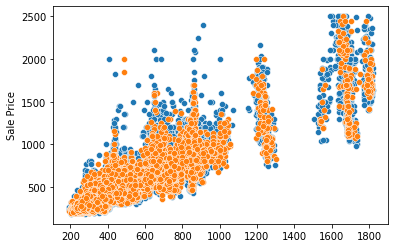

In [151]:
plot_pred(y_train,y_train_ridge_pred,y_test_ridge_pred,y_test)

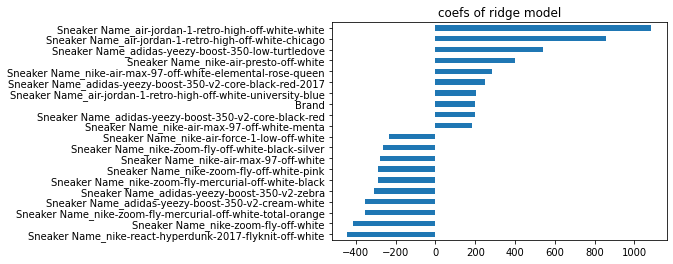

In [120]:
coefs=pd.Series(ridge.coef_,index=x_train.columns)
imp_coefs=pd.concat([coefs.sort_values().head(10),coefs.sort_values().tail(10)])
imp_coefs.plot(kind='barh')
plt.title('coefs of ridge model')
plt.show()

In [122]:
from sklearn.linear_model import RidgeCV,LassoCV,ElasticNetCV
lasso=LassoCV()
lasso.fit(x_train,y_train)
alpha=lasso.alpha_
print('best lasso alpha first iteration: ',alpha)

lasso=LassoCV(alphas=alpha*np.arange(0.5,1.6,0.05))
lasso.fit(x_train,y_train)
alpha=lasso.alpha_
print('best lasso alpha second iteration: ',alpha)

lasso=LassoCV(alphas=alpha*np.arange(0.5,1.6,0.05))
lasso.fit(x_train,y_train)
alpha=lasso.alpha_
print('best lasso alpha third iteration: ',alpha)

y_train_lasso_pred=lasso.predict(x_train)
y_test_lasso_pred=lasso.predict(x_test)

best lasso alpha first iteration:  9.297970633160036
best lasso alpha second iteration:  4.648985316580018
best lasso alpha third iteration:  2.324492658290009


In [123]:
from sklearn.metrics import mean_squared_error
print('RMSE on training Set: ',np.sqrt(mean_squared_error(y_train,y_train_lasso_pred)))
print('RMSE on testing Set: ',np.sqrt(mean_squared_error(y_test,y_test_lasso_pred)))

RMSE on training Set:  143.6757738329099
RMSE on testing Set:  138.0834922269379


lasso picked 19features and eliminated other 87features


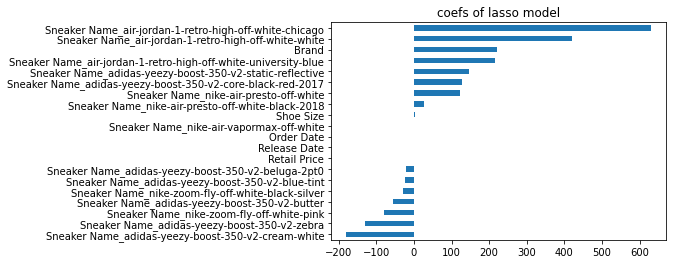

In [132]:
coefs=pd.Series(lasso.coef_,index=x_train.columns)
print('lasso picked '+str(sum(coefs!=0))+'features and eliminated other '+str(sum(coefs==0))+'features')
imp_coefs=pd.concat([coefs.sort_values().head(10),coefs.sort_values().tail(10)])
imp_coefs.plot(kind='barh')
plt.title('coefs of lasso model')
plt.show()

In [133]:
from sklearn.metrics import r2_score,mean_absolute_error
ind=y_test.index
print('Root mean squared error on testing set:',np.sqrt(mean_squared_error(y[ind],y_test_pred)))
print('R-square score on testing set:',r2_score(y[ind],y_test_pred))
print('mean absolute error on testing set:',mean_absolute_error(y[ind],y_test_pred))

Root mean squared error on testing set: 98.27576344029895
R-square score on testing set: 0.8351485756751162
mean absolute error on testing set: 60.27767039930338
